# **Lab02: Harris Corner Detection Algorithm**

In [0]:
# Import Statements
import cv2
import matplotlib.pyplot as plt
import numpy as np

## **Read Image in Grayscale Mode**

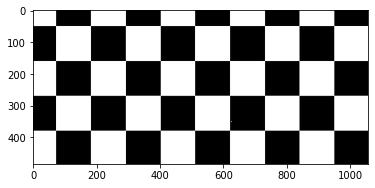

In [16]:
# Read and Convert Image to Grayscale
image = cv2.imread("Lab-02_Image.PNG",0)
plt.imshow(image, cmap="gray")

## **Compute Gradient X and Y**

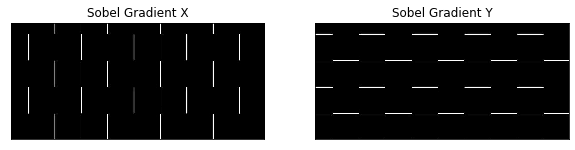

In [22]:
# Compute Gradient X and Y using Sobel Operator
kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
I_x = cv2.filter2D(image, -1, kernel_x)

kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
I_y = cv2.filter2D(image, -1, kernel_y)

# Plot Gradient X and Gradient Y
fig=plt.figure(figsize=(10,6))
fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plt.title("Sobel Gradient X")
plt.imshow(I_x, cmap="gray")
fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plt.title("Sobel Gradient Y")
plt.imshow(I_y, cmap="gray")
plt.show()

## **Compute Square and Product of derivatives**

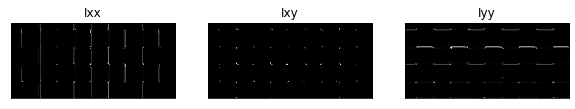

In [25]:
# Compute Square and Product of derivates and apply Gaussian Smoothing
Ixx = cv2.GaussianBlur(I_x**2, (3,3), 1)
Ixy = cv2.GaussianBlur(I_x * I_y, (3,3), 1)
Iyy = cv2.GaussianBlur(I_y**2, (3,3), 1)

# Plot Ixx, Ixy, Iyy
fig=plt.figure(figsize=(10,6))
fig.add_subplot(1, 3, 1, xticks=[], yticks=[])
plt.title("Ixx")
plt.imshow(Ixx, cmap="gray")
fig.add_subplot(1, 3, 2, xticks=[], yticks=[])
plt.title("Ixy")
plt.imshow(Ixy, cmap="gray")
fig.add_subplot(1, 3, 3, xticks=[], yticks=[])
plt.title("Iyy")
plt.imshow(Iyy, cmap="gray")
plt.show()

## **Calculate Harris Response**

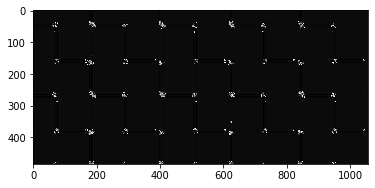

In [37]:
# Calculate Harris Response
k = 0.05
det_M = Ixx * Iyy - Ixy ** 2
trace = Ixx + Iyy 
harris_response = det_M - k * trace ** 2

plt.imshow(harris_response, cmap="gray")

## **Non maximum Suppression**

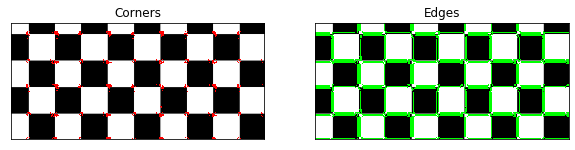

In [40]:
# Non max Suppression
# Edge : R < 0
# Corner : R > 0
# Flat: R = 0

corner_image = np.copy(cv2.cvtColor(image,cv2.COLOR_GRAY2RGB))
edge_image = np.copy(cv2.cvtColor(image,cv2.COLOR_GRAY2RGB))

for x, response in enumerate(harris_response):
  for y, r in enumerate(response):
    if r > 0:
      # Corner
      corner_image[x, y] = [255,0,0]
    elif r < 0:
      # Edge
      edge_image[x, y] = [0,255,0]

# Plot Corners and Edges
fig=plt.figure(figsize=(10,6))
fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plt.title("Corners")
plt.imshow(corner_image, cmap="gray")
fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plt.title("Edges")
plt.imshow(edge_image, cmap="gray")
plt.show()